In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [112]:
df = pd.read_csv("customer_segmentation.csv")

In [116]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [117]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [115]:
df.shape

(2240, 29)

## Data Cleaning

In [66]:
df.isnull().any().any()

True

In [118]:
null_values = df.isnull().sum()

print(null_values[null_values > 0])

Income    24
dtype: int64


In [68]:
df = df.dropna(subset=['Income'])
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2216


In [69]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [70]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [121]:
# Changing to datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)
current_date = pd.to_datetime("today")

In [123]:
df["Customer_Lifetime_Days"] = (current_date - df["Dt_Customer"]).dt.days

In [124]:
def customer_level(row):
    if row["Customer_Lifetime_Days"] <= 365:  # 0-1 year
        return "New Customer"
    elif 365 < row["Customer_Lifetime_Days"] <= 1095:  # 1-3 years
        return "Mid-Term Customer"
    else:  # 3 years
        return "Loyal Customer"
    
df["Customer_Level"] = df.apply(customer_level, axis=1)

print(df[["Dt_Customer", "Customer_Lifetime_Days", "Customer_Level"]].head())

  Dt_Customer  Customer_Lifetime_Days  Customer_Level
0  2012-09-04                    4459  Loyal Customer
1  2014-03-08                    3909  Loyal Customer
2  2013-08-21                    4108  Loyal Customer
3  2014-02-10                    3935  Loyal Customer
4  2014-01-19                    3957  Loyal Customer


In [125]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [126]:
df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Has Partner", 
    "Together": "Has Partner", 
    "Absurd": "No Partner", 
    "Widow": "No Partner", 
    "YOLO": "No Partner", 
    "Divorced": "No Partner", 
    "Single": "No Partner",
    "Alone": "No Partner"
})


In [127]:
# Creating Age column
df["Age"] = 2024-df["Year_Birth"]

In [128]:
#Total payment
df["Total_Payment"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ \
df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]


In [129]:
#Total children living with
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [130]:
df['Family_Members'] = df["Living_With"].replace({"Has Partner": 2, "No Partner": 1}) + df['Children']

/var/folders/pr/9bm58yl12_jgb_1gj55t5cjw0000gn/T/ipykernel_9605/598070136.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family_Members'] = df["Living_With"].replace({"Has Partner": 2, "No Partner": 1}) + df['Children']


In [131]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [139]:
df['Education'].value_counts()

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [140]:
df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})

In [141]:
# Dropping unnecessary columns

to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(to_drop, axis=1)

In [142]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Customer_Lifetime_Days,Customer_Level,Living_With,Age,Total_Payment,Children,Family_Members,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,4,7,4459,Loyal Customer,No Partner,67,1617,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,2,5,3909,Loyal Customer,No Partner,70,27,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,10,4,4108,Loyal Customer,Has Partner,59,776,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,4,6,3935,Loyal Customer,Has Partner,40,53,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,6,5,3957,Loyal Customer,Has Partner,43,422,1,3,1


In [143]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Lifetime_Days,Age,Total_Payment,Children,Family_Members,Is_Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,4.088156,2.672242,5.806510,5.321429,4149.714286,55.086347,607.268083,0.947559,2.593128,0.714286
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,2.742187,2.927542,3.250939,2.425597,202.494886,11.701599,602.513364,0.749466,0.906236,0.451856
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3796.000000,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,2.000000,0.000000,3.000000,3.000000,3976.000000,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,4.000000,2.000000,5.000000,6.000000,4152.000000,54.000000,397.000000,1.000000,3.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,6.000000,4.000000,8.000000,7.000000,4325.000000,65.000000,1048.000000,1.000000,3.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,27.000000,28.000000,13.000000,20.000000,4495.000000,84.000000,2525.000000,3.000000,5.000000,1.000000


Relative Plot of Some Selected Features: A Data Subset


/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/opt/anaconda3/lib/python3.9/s

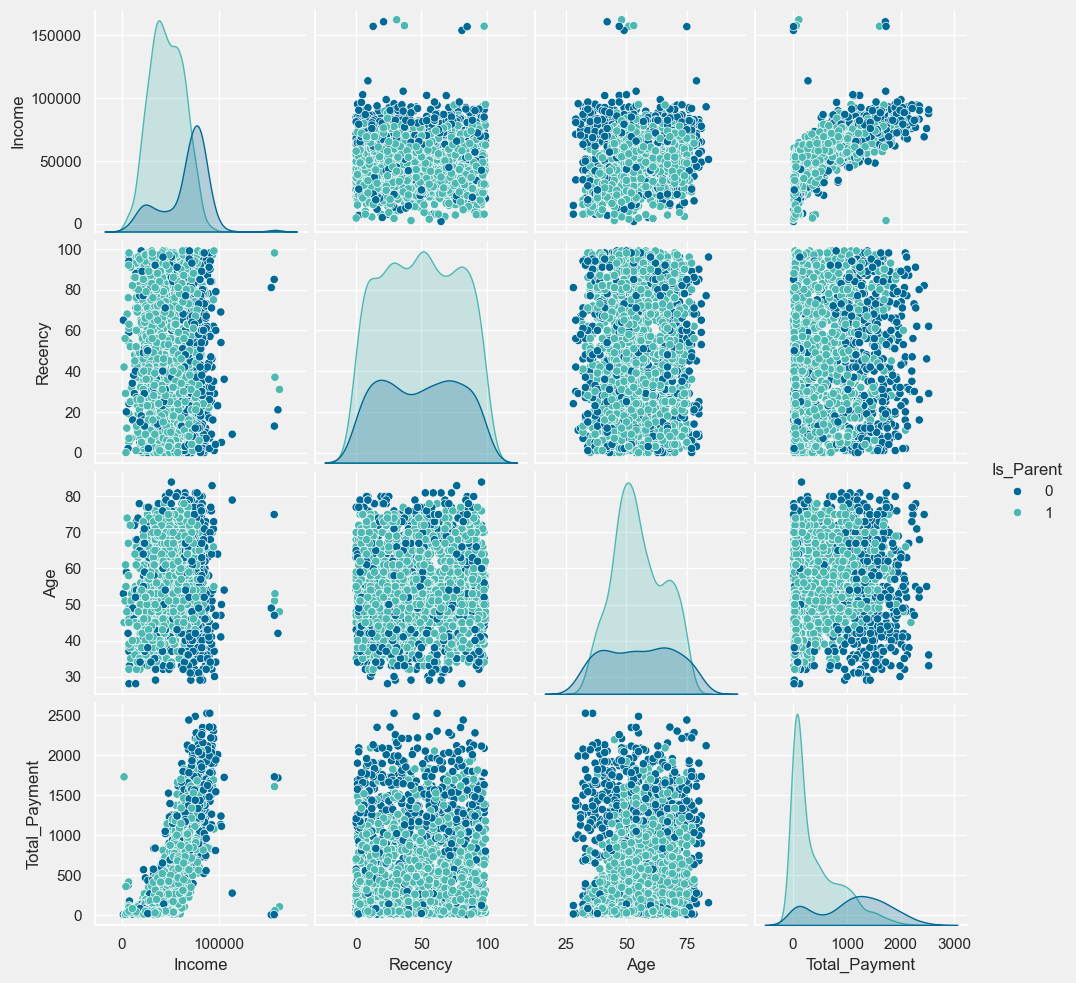

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

# Set custom color palette for the plots
sns.set(rc={"axes.facecolor":"#F0F0F0", "figure.facecolor":"#F0F0F0"})  # Set background to light gray
pallet = ["#006994", "#4DB8B1", "#87C1B5", "#A1D9C8", "#AEE1D4", "#C1F2E6"]  # Blue-green colors
cmap = colors.ListedColormap(pallet)

# Select columns for plotting (modify this to match the columns you are interested in)
To_Plot = ["Income", "Recency", "Age", "Total_Payment", "Is_Parent"]

# Plot the pairplot with the selected columns and using 'Is_Parent' for color hue
print("Relative Plot of Some Selected Features: A Data Subset")
sns.pairplot(df[To_Plot], hue="Is_Parent", palette=pallet)

# Display the plot
plt.show()


Relative Plot of Some Selected Features: A Data Subset


/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/opt/anaconda3/lib/python3.9/s

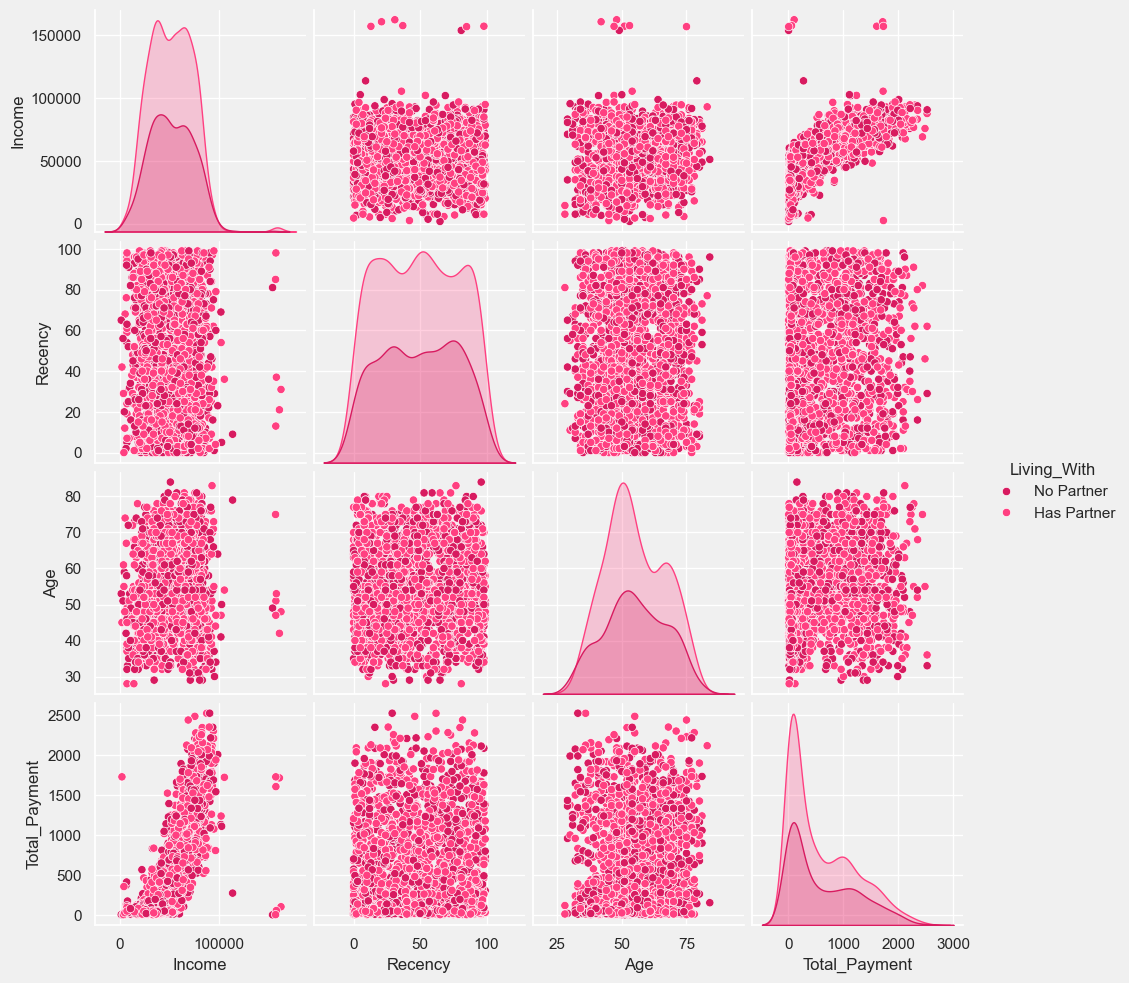

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

# Set custom color palette for the plots
sns.set(rc={"axes.facecolor":"#F0F0F0", "figure.facecolor":"#F0F0F0"})  # Set background to light gray

# Koyu ve açık pembe tonları
pallet = ["#D81B60", "#FF4081", "#FF80AB", "#FFB3C1", "#FFCCE5", "#FCE4EC"]  # Dark to soft pink tones
cmap = colors.ListedColormap(pallet)

# Select columns for plotting (modify this to match the columns you are interested in)
To_Plot = ["Income", "Recency", "Age", "Total_Payment", 'Living_With']

# Plot the pairplot with the selected columns and using 'Living_With' for color hue
print("Relative Plot of Some Selected Features: A Data Subset")
sns.pairplot(df[To_Plot], hue="Living_With", palette=pallet)

# Display the plot
plt.show()


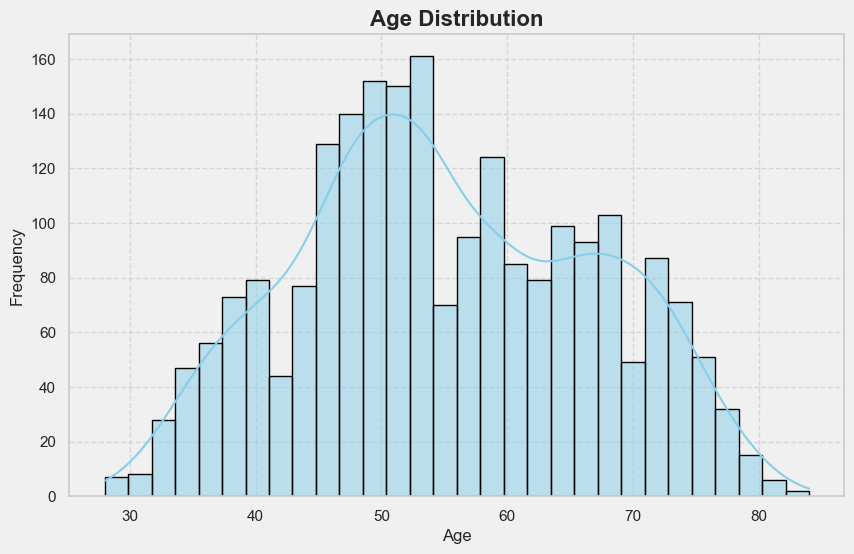

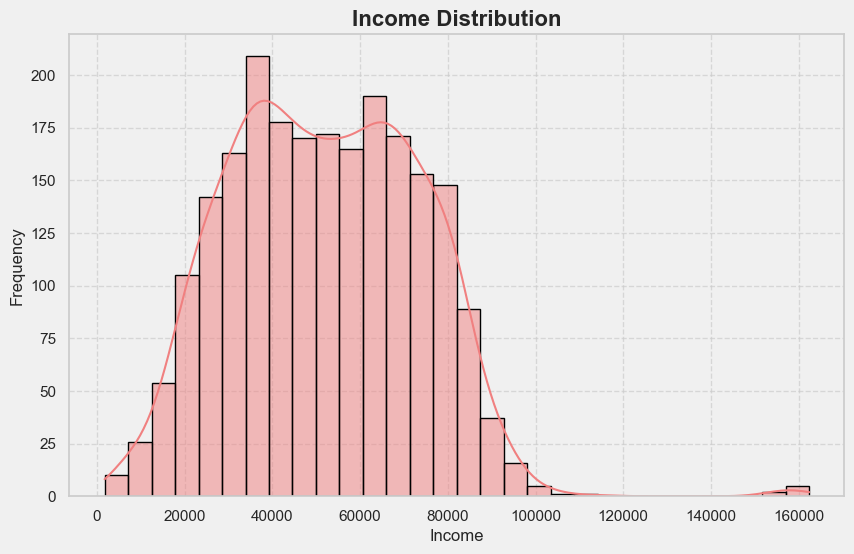

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set custom style for modern and clean appearance
sns.set(style="whitegrid", rc={"axes.facecolor": "#F0F0F0", "figure.facecolor": "#F0F0F0"})  # Light gray background

# Visualize Age distribution with improved style
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, color='skyblue', kde=True, edgecolor='black')
plt.title('Age Distribution', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualize Income distribution with improved style
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, color='lightcoral', kde=True, edgecolor='black')
plt.title('Income Distribution', fontsize=16, weight='bold')
plt.xlabel('Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [147]:
df = df[df['Income'] <= 600000]  # Geliri 600.000'in üzerinde olanlar
print("The total number of data-points after removing wrong income:", len(df))

The total number of data-points after removing wrong income: 2212


In [148]:
df = df[df['Age'] <= 85]  
print("The total number of data-points after removing >100:", len(df))

The total number of data-points after removing >100: 2212


## Pre-processing 

In [149]:
# Categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Customer_Level', 'Living_With']


In [151]:
# Label Encoding for the categorical variables
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    

In [152]:
df2 = df.copy()
scaler = MinMaxScaler()
df_scaled = scaler.fit(df2)
scaled_df = pd.DataFrame(scaler.transform(df2),columns= df2.columns )

In [153]:
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Customer_Lifetime_Days,Customer_Level,Living_With,Age,Total_Payment,Children,Family_Members,Is_Parent
0,0.0,0.351086,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,...,0.307692,0.35,0.948498,0.0,1.0,0.696429,0.639683,0.000000,0.00,0.0
1,0.0,0.277680,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,...,0.153846,0.25,0.161660,0.0,1.0,0.750000,0.008730,0.666667,0.50,1.0
2,0.0,0.434956,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,...,0.769231,0.20,0.446352,0.0,0.0,0.553571,0.305952,0.000000,0.25,0.0
3,0.0,0.155079,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,...,0.307692,0.30,0.198856,0.0,0.0,0.214286,0.019048,0.333333,0.50,1.0
4,0.5,0.352051,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,...,0.461538,0.25,0.230329,0.0,0.0,0.267857,0.165476,0.333333,0.50,1.0


## Elbow Method

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

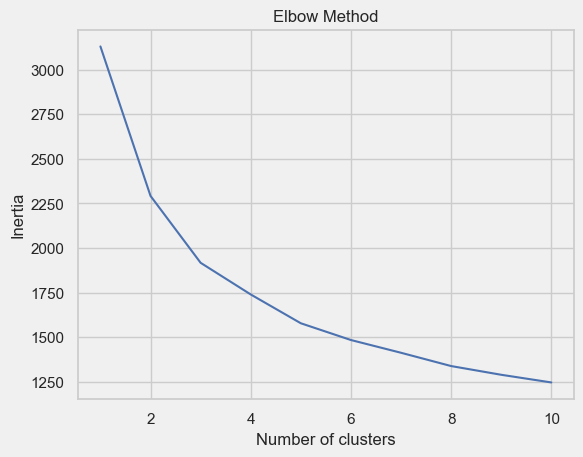

In [154]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method ile optimal küme sayısını bulma
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)  # df_scaled kullanılmalı
    inertia.append(kmeans.inertia_)

# Grafikle optimal küme sayısını bulma
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Clustering Methods

## K-Means 

In [185]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=50)
kmeans.fit(scaled_df)
cluster_labels = kmeans.labels_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [186]:
df['Cluster'] = cluster_labels

In [188]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_df, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.21416380707085655


## Agglomerative Clustering

In [189]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Agglomerative Clustering modeli
agglo = AgglomerativeClustering(n_clusters=5)  # Burada küme sayısını belirleyebilirsiniz
agglo_labels = agglo.fit_predict(scaled_df)  # scaled_df, veri setiniz

# Küme etiketlerini alın
print("Agglomerative Clustering Labels:")
print(agglo_labels)

# Silhouette Score ile kümeleme kalitesini değerlendirme
silhouette_avg = silhouette_score(scaled_df, agglo_labels)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg}")


Agglomerative Clustering Labels:
[4 2 0 ... 4 3 1]
Silhouette Score for Agglomerative Clustering: 0.1880058080278573


## PCA REDUCTION

In [218]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensions to 2 using PCA
pca = PCA(n_components=2)
pca.fit(scaled_df)  # scaled_df: The scaled version of your data
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=["PC1", "PC2"])

In [219]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
AC = AgglomerativeClustering(n_clusters=5)  # Set the number of clusters to 5
yhat_AC = AC.fit_predict(PCA_df)  # Apply clustering to the PCA-reduced 2D data

# Add cluster labels to the 2D PCA DataFrame
PCA_df["Clusters"] = yhat_AC

# Add cluster labels to the original DataFrame
scaled_df["Clusters"] = yhat_AC

In [220]:
print(PCA_df.head())  # Display the PCA DataFrame with added cluster labels
print(scaled_df[["Clusters"]].head())  # Display the original DataFrame with added cluster labels

        PC1       PC2  Clusters
0  2.686228  0.784727         3
1 -1.698752  0.231181         0
2  0.817617  0.310404         4
3 -0.610873 -0.420856         2
4 -0.520667 -0.332882         2
   Clusters
0         3
1         0
2         4
3         2
4         2


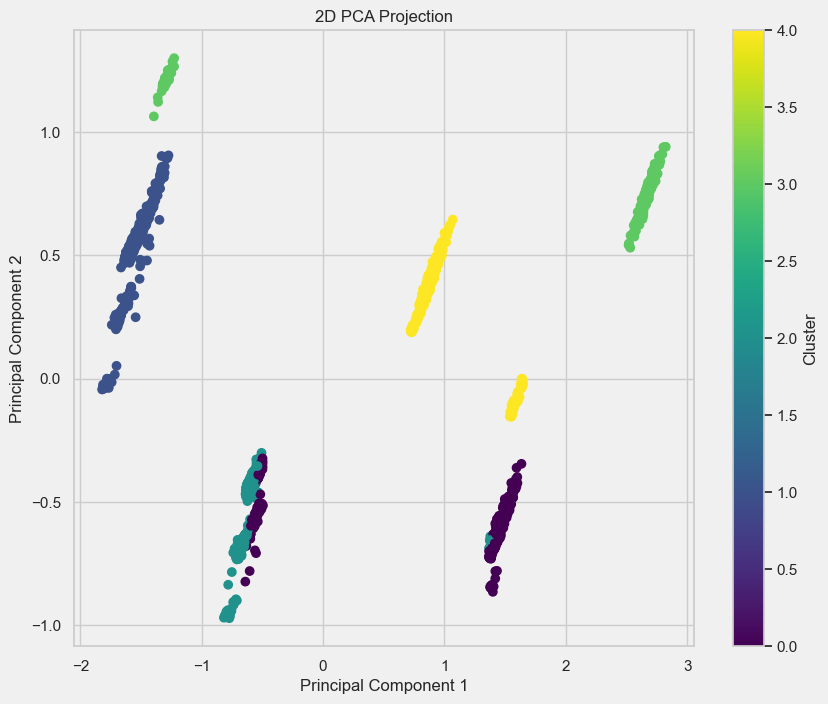

In [221]:
# 2D scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(PCA_df["PC1"], PCA_df["PC2"], c=cluster_labels, cmap='viridis')  # cluster_labels indicate clusters for each observation
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.colorbar(label='Cluster')
plt.show()

In [223]:
# Calculate the Silhouette Score for the PCA-reduced data
sil_score = silhouette_score(PCA_df[["PC1", "PC2"]], PCA_df["Clusters"])

print("Silhouette Score for PCA-reduced data: ", sil_score)

Silhouette Score for PCA-reduced data:  0.8327815637518862
